In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('../numpy_images/reeses_puffs.jpg',0)

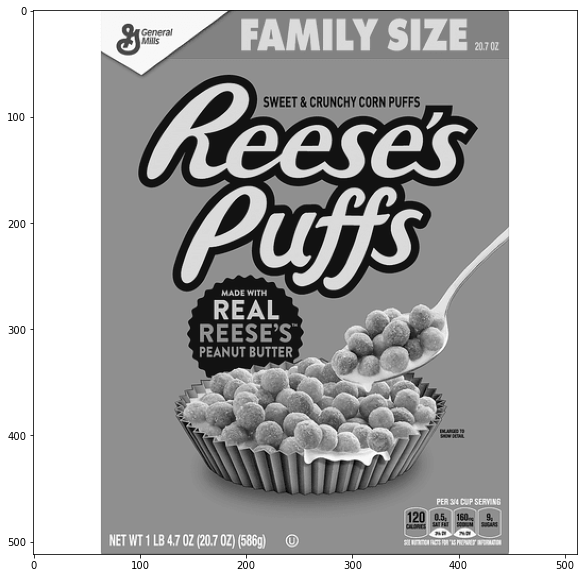

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('../numpy_images/many_cereals.jpg',0)

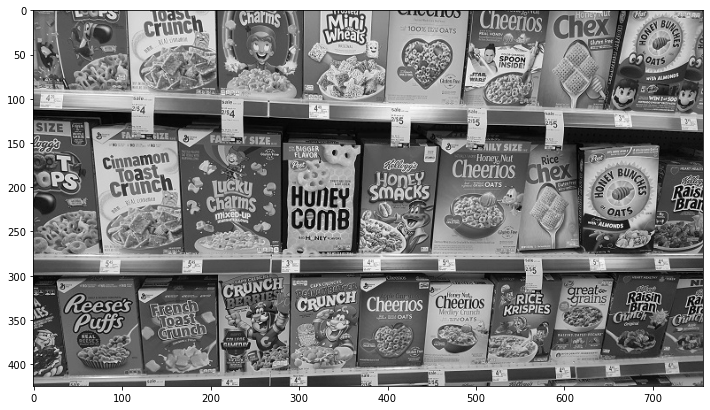

In [6]:
display(cereals)

In [18]:
## Brute-Force Matching with ORB Descriptors

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(des1,des2)

In [12]:
single_match = matches[0]

In [13]:
single_match.distance

72.0

In [15]:
len(matches)

142

In [14]:
matches = sorted(matches,key=lambda x:x.distance)

In [16]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

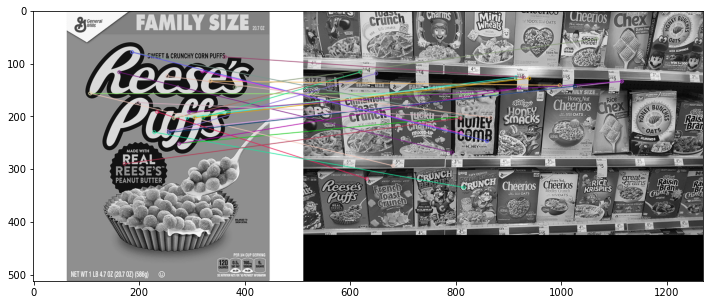

In [17]:
display(reeses_matches)

In [20]:
## Brute-Force Matching with SIFT(Scale Invariant Feature Transform) Descriptors and Ratio Test

In [21]:
sift = cv2.xfeatures2d.SIFT_create()

In [22]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [24]:
des1

array([[33.,  1.,  0., ...,  5., 82.,  0.],
       [ 0.,  1., 95., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  4.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [57.,  2.,  2., ...,  0.,  0.,  0.]], dtype=float32)

In [23]:
bf = cv2.BFMatcher()

In [25]:
matches = bf.knnMatch(des1,des2,k=2)

In [27]:
good = []

# LESS DISTANCE == BETTER MATCH

# RATIO MATCH1 < 75% MATCH2 
for match1,match2 in matches:
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LETS KEEP IT!
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [29]:
len(good)

67

In [30]:
len(matches)

1043

In [31]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

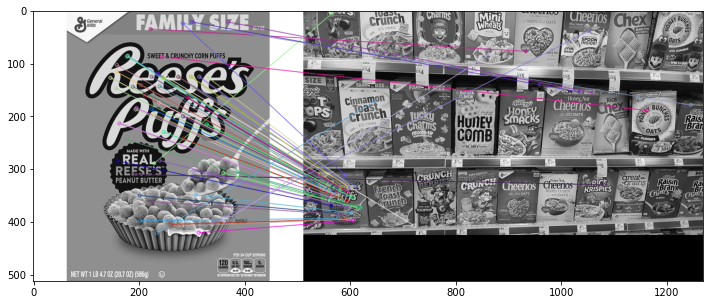

In [32]:
display(sift_matches)

In [42]:
sift = cv2.xfeatures2d.SIFT_create()

In [43]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [44]:
## FLANN(Fast Library for Approximate Nearest Neighbours)
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [45]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [46]:
matches = flann.knnMatch(des1,des2,k=2)

In [48]:
matchesMask = [[0,0] for i in range(len(matches))]

In [50]:
#matchesMask

In [51]:
#good = []

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
        #good.append([match1])

In [54]:
draw_params = dict(matchColor=(0,0,255),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)

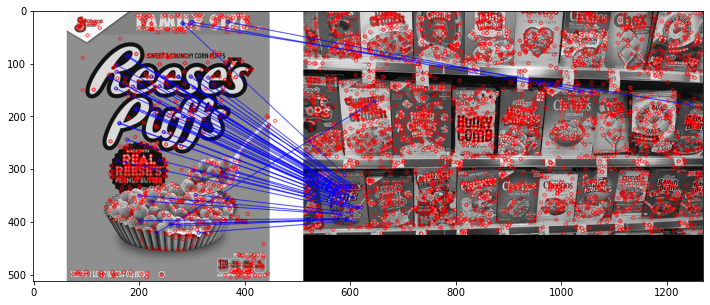

In [55]:
#flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)